KeywordGraph: https://github.com/rangeonnicolas/keywordGraph/blob/master/keyWordGraph.py

CDlib - Community Discovery Library: https://cdlib.readthedocs.io/en/latest/index.html

TextRank-Keyword-Extraction: https://github.com/JRC1995/TextRank-Keyword-Extraction

In [ ]:
!python -m spacy download en_core_web_lg
!pip install sentence-transformers
!pip install gensim
!pip install networks
!pip install matplotlib
!pip install yake
!pip install editdistance==0.3.1
!pip install nltk

!pip install textgraphics
!pip install networkx
!pip install python-louvain
!pip install cdlib
!pip install communities
!pip install icecream

2021-03-30 17:06:10.428053: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-03-30 17:06:10.428096: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |████████████████████████████████| 778.8 MB 13 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
     |████████████████████████████████| 74 kB 654 kB/s 
     |████████████████████████████████| 2.0 MB 19.7 MB/s 
     |████████████████████████████████| 1.2 MB 46.5 MB/s 
     |████████████████████████████████| 883 kB 18.1 MB/s 
     |████████████████████████████████| 3.2 MB 32.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_tran

In [ ]:
import sys
sys.path.insert(1, '/work/IFT6010_Story_Tree/src/features/')

#from keyword_extractor import f_measure
#from keyword_extractor import keyword_extractor

from keyWordGraph import KeywordGraph

from utils_cosine_tf_idf import get_corpus_tf_idf
from utils_cosine_tf_idf import do_cosine_similarity
import utils_cosine_tf_idf as util

import pandas as pd
from cdlib import algorithms
import networkx as nx
# import communities

#news_dataset["extracted_keywords"] = news_dataset["TEXT"].apply(keyword_extractor)
#news_dataset.to_pickle("/work/News_dataset/pd_news_dataset_2.pickle")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Import Data

In [ ]:
# import numpy as np
# import re
# import nltk
# import itertools
# import yake
# import gensim

# from sklearn.feature_extraction.text import CountVectorizer
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity
# from nltk.corpus import stopwords
# from gensim.summarization import keywords as keywords_gensim
# import editdistance as Levenshtein
# import spacy

# #nlp = spacy.load("en_core_web_lg")
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# def keyword_extraction_baseline(text, number_keyword=40, language = "en", max_ngram_size = 1, deduplication_thresold = 0.9, deduplication_algo = 'seqm', windowSize = 1):
#     kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=number_keyword, features=None)
#     keywords = kw_extractor.extract_keywords(text)
#     keywords_extractor = [i[0] for i in keywords] 

#     return keywords_extractor

In [ ]:
news_dataset = pd.read_pickle("/work/IFT6010_Story_Tree/data/short_news_dataset_2_with_extractedkeyword.pickle")

## Get TD-IDF 

In [ ]:

#arg 1 = dataframe source
#arg 2 = colomne d'ou le texte provient (je l'ai mis en argument parce que je ne connais pas la structure des autres dataframe)
##arg 3 = ngram a considerer... possible solution pour les keywords a n mots (n>1)

dataset_tf_idf, dict_weights = get_corpus_tf_idf(news_dataset,'TEXT',ngram=1)

# Create Graph with keyWordGraph

In [ ]:
take_tfidf = False

In [ ]:
my_file = open("long_stopwords.txt", "r")
long_list_of_stopwords = my_file.read().split("\n")

In [ ]:
keyword_list = list(news_dataset["extracted_keywords"])
keyword_dict = {}
print(keyword_list)
count=0 
count_else=0
for doc_idx, doc in enumerate(keyword_list):
    doc_dict= {}
    for word_idx, word in enumerate(doc):
        # doc_dict[word_idx] = {'word':word}
      
        # take tfidf weights
        if take_tfidf:
            if word not in dict_weights:
                count+=1
                # doc_dict[word_idx] = {'word':word, 'weight': 1/len(doc)}
            elif round(dict_weights[word], 5) > 0:
                count_else+=1
                doc_dict[word_idx] = {'word':word, 'weight': round(dict_weights[word], 4)*1000}
                
        # don't take tfidf 
        else:
            #if word not in long_list_of_stopwords:
            doc_dict[word_idx] = {'word':word, 'weight': 1}
            #else:
            #    print(word)
            

        # doc_dict[word_idx] = {'word':word, 'weight': 1/len(doc)}
    keyword_dict[doc_idx] = doc_dict
print(keyword_dict)

[['messenger', 'facebook', 'chat', 'find', 'unfolds', 'happening', 'world'], ['monday', 'trailer', 'night', 'rey', 'jedi', 'espn', 'football', 'bears', 'new', 'disney', 'skywalker', 'stars', 'like', 'ren', 'youtube', 'lucasfilm', 'halftime', 'minnesota vikings', 'adam', 'fisher'], ['details', 'perfumer', "harris'", 'objects', 'feature', 'series', 'captures', 'creation', 'london', 'partner', 'christophe', 'seasonal', 'bespoke', 'miller', 'craft', 'lyn', 'business', 'doubles', 'shopfront', 'customization', 'tailor', 'perfumes', 'marylebone', 'paris', 'grasse, harris'], ['cnn', 'accra', 'saturday', 'ghana', 'people', 'officials', 'incidents', 'tanker', 'exploded', 'said', 'massive', 'streets', 'showed charred', 'gas station', 'killed', 'injured', 'october', 'president', 'killing', 'explosion', '@nakufoaddo'], ['spain', 'catalan', 'independence', 'puigdemont', 'barcelona', 'minister', 'spanish', 'government', 'independently', 'police', 'referendum', 'mayor', 'october', 'monday', 'president

In [ ]:
keep_in_memory= True
keyword_graph = KeywordGraph(keyword_dict)

In [ ]:
keywords = keyword_graph.get_keywords()
keywords_bipartite = keyword_graph.get_bipartite(keep_in_memory= keep_in_memory)
keyword_node = keyword_graph.get_nodes(keep_in_memory= keep_in_memory)
keyword_edges = keyword_graph.get_edges(min_nb_of_texts_for_each_word=10, keep_in_memory= keep_in_memory)
max_edge_weight_by_word = keyword_graph.get_max_edge_weight_by_word(keep_in_memory= keep_in_memory)
keyword_clusters = keyword_graph.compute_clusters(keep_in_memory= keep_in_memory)

In [ ]:
keyword_clusters

,cluster,label,betcen
facebook,cl_0,facebook,0.021071
world,cl_0,world,0.011171
find,cl_0,find,0.000361
messenger,cl_0,messenger,0.000000
chat,cl_0,chat,0.000000
...,...,...,...
santa ana,cl_6,santa ana,0.000008
anaheim hills,cl_6,anaheim hills,0.000008
santa rosa's,cl_6,santa rosa's,0.000008
journey's,cl_6,journey's,0.000008


In [ ]:
#print(keywords)
#print(keywords_bipartite)
#print(keyword_node)
print(keyword_edges[1])
#print(max_edge_weight_by_word)
#print(keyword_clusters)
keyword_nxGraph = keyword_graph.nxGraph
print(keyword_nxGraph)
print(keyword_nxGraph.nodes(data=True))
# keyword_clusters[keyword_clusters["cluster"] == "cl_6"]
# keyword_clusters.head()

('chat', 'messenger', 22)

[('facebook', {}), ('messenger', {}), ('chat', {}), ('find', {}), ('unfolds', {}), ('happening', {}), ('world', {}), ('night', {}), ('monday', {}), ('espn', {}), ('new', {}), ('like', {}), ('london', {}), ('series', {}), ('paris', {}), ('saturday', {}), ('cnn', {}), ('ghana', {}), ('people', {}), ('said', {}), ('killed', {}), ('october', {}), ('president', {}), ('killing', {}), ('independence', {}), ('spain', {}), ('barcelona', {}), ('minister', {}), ('government', {}), ('police', {}), ('referendum', {}), ('cnnmoney', {}), ('tuesday', {}), ('madrid', {}), ('france', {}), ('the european union', {}), ('donald', {}), ('trump', {}), ('secretary', {}), ('summer', {}), ('cabinet', {}), ('the white house', {}), ('sanders', {}), ('health', {}), ('power', {}), ('daughter', {}), ('nurse', {}), ('sister', {}), ('diabetes', {}), ('massachusetts', {}), ('north carolina', {}), ('epa', {}), ('obama', {}), ('cnn health on facebook and twitter', {}), ('news', {}), ('political

In [ ]:
# docs_with_keyword_clusters = keyword_graph.get_docs_with_keyword_clusters()
# print(docs_with_keyword_clusters)

## COSINE SIMILARITY

In [ ]:
# do_cosine_similarity return the cosine similarity between 2 list of any length
#                => Easy adapt to use it for 2 docs or a doc and a cluster

# the input should be a dictionary  { keyword:weight }

#P.S I modified the function that compute dataset_tf_idf, => Now the colomn vector is a dictionary

do_cosine_similarity(dataset_tf_idf.iloc[0]['VECTOR'],dataset_tf_idf.iloc[2]['VECTOR'])

0.21925583584401553

In [ ]:
import nltk

In [ ]:
def prepare_cluster_vector(dataframe):
    all_cluster = dataframe['cluster'].unique()

    all_cluster_dict = {}

    for cluster in all_cluster:
        cluster_dict ={}
        all_keyword=list(keyword_clusters[keyword_clusters["cluster"] == cluster]['label'])
        # print(all_keyword)
        all_keyword=' '.join(all_keyword)
        # print(all_keyword)


        tokens = nltk.word_tokenize(all_keyword)
        

        #!!!!DEAL with keyword with multiple word ... some keyword are not int the dictionary of all weights

        for token in tokens:
            if token in dict_weights:
                cluster_dict[token]=dict_weights[token]
            else:
                cluster_dict[token]=0

        # print(cluster_dict)
        all_cluster_dict[cluster]=cluster_dict
        
    return all_cluster_dict
    

In [ ]:
clusters_vector = prepare_cluster_vector(keyword_clusters)
clusters_vector 

{'cl_0': {'facebook': 0.010402222166680766,
  'world': 0.01649194096565685,
  'find': 0.011035393649675106,
  'messenger': 0.010789461602160046,
  'chat': 0.010449574311118917,
  'unfolds': 0.010844213680244323,
  'happening': 0.009717578335407207},
 'cl_1': {'cnn': 0,
  'like': 0.013381099335586658,
  'wednesday': 0.0033869703331509695,
  'monday': 0.004776423364544332,
  'twitter': 0.0052093853367919055,
  'the': 0.0005417656409901143,
  'new': 0,
  'york': 0.006675009899446198,
  'times': 0.006035947010245638,
  'hollywood': 0.004301632536189951,
  'wife': 0.0033589925655597894,
  'city': 0.006877988693987651,
  'las': 0.003993517870488681,
  'vegas': 0.004432159499685928,
  'us': 0.018608473383810775,
  'american': 0.00634169943350864,
  'los': 0.0021468628370636704,
  'angeles': 0.0019408190252881317,
  'saturday': 0.0026735074936280125,
  'police': 0.00915214913855036,
  'story': 0.009182477987087661,
  'fox': 0.0032675762957829653,
  'news': 0.006978508896425618,
  'party': 0.00

In [ ]:
#cosine similarity between a doc and a cluster

do_cosine_similarity(dataset_tf_idf.iloc[2]['VECTOR'],clusters_vector['cl_0'])

0.2564949345760502

In [ ]:
def set_document_topic(document_vector, all_cluster_vector):
    max_cluster_name=''
    max_cluster_value=0
    for cluster in all_cluster_vector:
        cluster_value= do_cosine_similarity(document_vector,clusters_vector[cluster])
        # print(cluster_value)

        if (max_cluster_value<cluster_value):
            max_cluster_value=cluster_value
            max_cluster_name=cluster
    
    # print(max_cluster_name)
    # print(max_cluster_value)
    return max_cluster_name



In [ ]:
#TESTING 
# set_document_topic(dataset_tf_idf.iloc[435]['VECTOR'],clusters_vector)

In [ ]:
#Apply to all the dataframe 

dataset_tf_idf['TOPIC']=dataset_tf_idf['VECTOR'].apply(set_document_topic,all_cluster_vector=clusters_vector)

In [ ]:
dataset_tf_idf.head()

,Unnamed: 0,KEYWORDS,SUMMARY,TEXT,TITLE,date,extracted_keywords,PREPROCESSING_TEXT,VECTOR,TOPIC
1,1,"['facebook', 'whats', 'world', 'unfolds', 'tam...",Chat with us in Facebook Messenger.\nFind out ...,Chat with us in Facebook Messenger. Find out w...,Tamagotchi is back,10-06-2017,"[messenger, facebook, chat, find, unfolds, hap...",chat us facebook messenger find 's happening w...,"{'chat': 0.010449574311118917, 'us': 0.0186084...",cl_0
2,2,"['jedi', 'shots', 'rey', 'force', 'wars', 'sta...","ESPN's ""Monday Night Football"" had bears, viki...","ESPN's ""Monday Night Football"" had bears, viki...",'Star Wars: The Last Jedi' trailer debuts on '...,10-06-2017,"[monday, trailer, night, rey, jedi, espn, foot...",espn 's monday night football '' bears vikings...,"{'espn': 0.0024385780614651397, 'monday': 0.00...",cl_1
3,3,"['clients', 'art', 'science', 'scent', 'collid...","Lyn Harris' independent space, Perfumer H , in...","This feature is part of ' Details ,' a new ser...",Art and science collide in this one-of-a-kind ...,10-06-2017,"[details, perfumer, harris', objects, feature,...",feature part details new series captures creat...,"{'feature': 0.0015220018995126942, 'part': 0.0...",cl_0
4,4,"['akufoaddo', 'tanker', 'incidents', 'dozens',...",(CNN) A tanker exploded near a gas station in ...,(CNN) A tanker exploded near a gas station in ...,"Seven killed, dozens injured in Ghana tanker e...",10-06-2017,"[cnn, accra, saturday, ghana, people, official...",cnn tanker exploded near gas station accra sat...,"{'tanker': 0.00027957512873095494, 'exploded':...",cl_2
5,5,"['spanish', 'independence', 'regions', 'meets'...","Carles Puigdemont, the President of Catalonia,...",(CNN) Pro-independence Catalans gathered on th...,Catalans' future on line as parliament meets,10-06-2017,"[spain, catalan, independence, puigdemont, bar...",cnn proindependence catalans gathered streets ...,"{'proindependence': 0.00012037100144982589, 'c...",cl_0


# Visualize graph

Visualization to test:

https://github.com/shobrook/communities

https://cambridge-intelligence.com/python-graph-visualization-using-jupyter-regraph/

https://github.com/BrambleXu/news-graph

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

Not in python:

https://gephi.org/

draw(): draw the graph as a simple representation with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default. See draw_networkx() for more full-featured drawing that allows title, axis labels etc.

draw_networkx(): draw the graph with Matplotlib with options for node positions, labeling, titles, and many other drawing features. See draw() for simple drawing without labels or axes.

#https://stackoverflow.com/questions/45350222/select-nodes-and-edges-form-networkx-graph-with-attributes

# CDlib - Community Discovery Library

Community detection example with Cdlib: https://colab.research.google.com/github/GiulioRossetti/cdlib/blob/master/docs/CDlib.ipynb

In [ ]:
from cdlib import algorithms, viz
keyword_nxGraph = keyword_graph.nxGraph
print(len(keyword_nxGraph))

399


## Louvain community detection

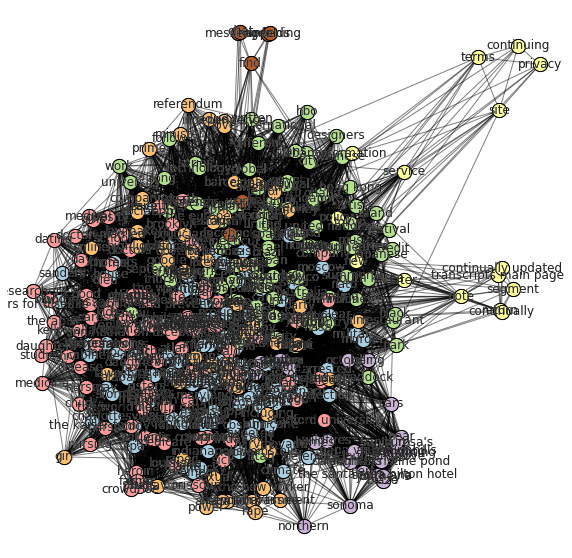

In [ ]:
louvain_communities = algorithms.louvain(keyword_nxGraph, weight='weight', resolution=1., randomize=False)
keyword_pos = nx.spring_layout(keyword_nxGraph)
viz.plot_network_clusters(keyword_nxGraph, louvain_communities, keyword_pos, figsize=(10, 10), cmap="Paired", plot_labels= True)

In [ ]:
louvain_communities.to_node_community_map()

defaultdict(list,
            {'espn': [0],
             'london': [0],
             'paris': [0],
             'president': [0],
             'donald': [0],
             'trump': [0],
             'secretary': [0],
             'cabinet': [0],
             'the white house': [0],
             'sanders': [0],
             'epa': [0],
             'obama': [0],
             'florida': [0],
             'presidential': [0],
             'puerto rico': [0],
             'texas': [0],
             'the washington post': [0],
             'white house': [0],
             'america': [0],
             'south carolina': [0],
             'philadelphia': [0],
             'congress': [0],
             'rapper': [0],
             'gay': [0],
             'nuclear': [0],
             'states': [0],
             'national': [0],
             'war': [0],
             'protests': [0],
             'charlottesville': [0],
             'virginia': [0],
             'gop': [0],
             'nasa': [0]

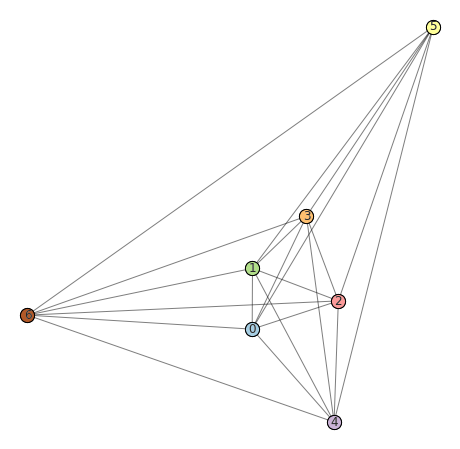

In [ ]:
viz.plot_community_graph(keyword_nxGraph, louvain_communities, cmap="Paired", plot_labels= True)

## Girvan Newman detection : betweenness centrality score

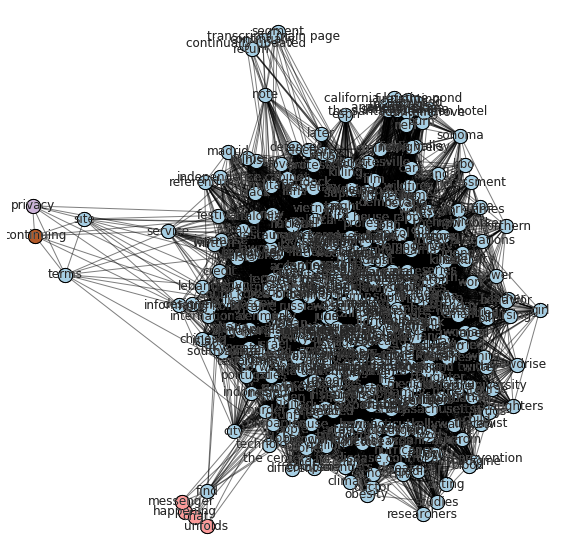

In [ ]:
girvan_newman_communities = algorithms.girvan_newman(keyword_nxGraph, level=3)
keyword_pos = nx.spring_layout(keyword_nxGraph)
viz.plot_network_clusters(keyword_nxGraph, girvan_newman_communities, keyword_pos, figsize=(10, 10), cmap="Paired", plot_labels= True)

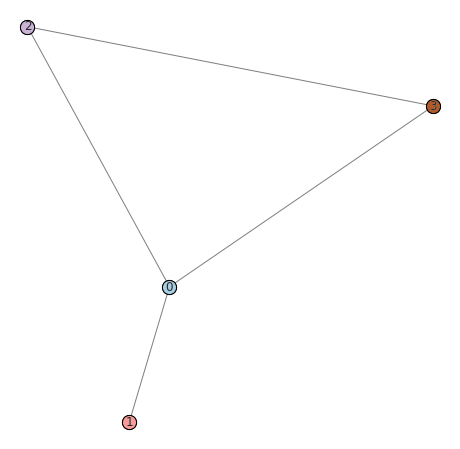

In [ ]:
viz.plot_community_graph(keyword_nxGraph, girvan_newman_communities, cmap="Paired", plot_labels= True)

## Laiden community detection

laiden code: https://tnetwork.readthedocs.io/en/latest/_modules/tnetwork/DCD/externals/MuchaLeiden.html

In [ ]:
!pip install igraph
!pip install jgraph
!pip install python-igraph
!pip install leidenalg

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# import leidenalg
# import jgraph as ig

In [ ]:
# leiden_keyword_communities = algorithms.leiden(keyword_nxGraph)

In [ ]:
# coms = algorithms.surprise_communities(keyword_nxGraph)


In [ ]:
try:
    import igraph as ig
except ModuleNotFoundError:
    print("prob")

In [ ]:
try:
    import jgraph as ig
except ModuleNotFoundError:
    print("prob")

# Evaluation of community with Cdlib

Evaluation meaning: https://hal.archives-ouvertes.fr/hal-02197272/document



Community Detection on Networks with Ricci Flow: https://www.nature.com/articles/s41598-019-46380-9.pdf

Experimental results. To evaluate the clustering accuracy of our algorithm, we tested the clustering result with
two diferent metrics: Adjusted Rand Index (ARI) and modularity. ARI measures the accuracy of clustering result
with the ground truth clustering. Modularity quantifes the strength of the community structure of a given graph
without the need of ground-truth clustering.

In [ ]:
    keyword_communities = algorithms.louvain(keyword_nxGraph, weight='weight', resolution=1., randomize=False)

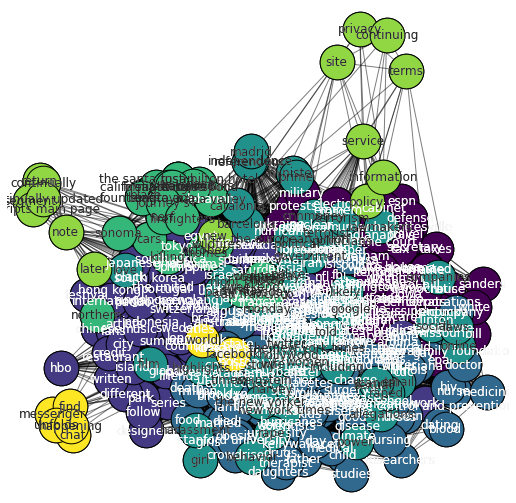

In [ ]:
keyword_pos = nx.spring_layout(keyword_nxGraph)
viz.plot_network_clusters(keyword_nxGraph, keyword_communities, keyword_pos, figsize=(9, 9), node_size=1200, cmap="viridis", plot_labels= True)

In [ ]:
keyword_communities.average_internal_degree()
keyword_communities.average_internal_degree(summary=False)

[53.75471698113208,
 38.526315789473685,
 40.46808510638298,
 22.18867924528302,
 25.93103448275862,
 7.2,
 6.0]

In [ ]:
from cdlib import evaluation

# The average degree: 2eC/nC = number of community internal edges in C / number of community nodes in C
evaluation.average_internal_degree(keyword_nxGraph, keyword_communities)

FitnessResult(min=6.0, max=53.75471698113208, score=27.724118800718625, std=16.404360096680154)

In [ ]:
lp_coms = algorithms.label_propagation(keyword_nxGraph)

keyword_communities.normalized_mutual_information(lp_coms)

MatchingResult(score=0.050629144112143254, std=None)

In [ ]:
evaluation.normalized_mutual_information(keyword_communities, lp_coms)

MatchingResult(score=0.050629144112143254, std=None)

In [ ]:
lp_coms

In [ ]:
keyword_communities

In [ ]:
news_dataset.head()

# Useless things

In [ ]:
# viz.plot_sim_matrix(clusterings, scoring)	#Plot a similarity matrix between a list of clusterings, using the provided scoring function.
# viz.plot_com_stat(com_clusters, com_fitness)	#Plot the distribution of a property among all communities for a clustering, or a list of clusterings (violin-plots)
# viz.plot_com_properties_relation(com_clusters, …)	#Plot the relation between two properties/fitness function of a clustering
# viz.plot_scoring(graphs, ref_partitions, …[, …])

# Subgraph 

399


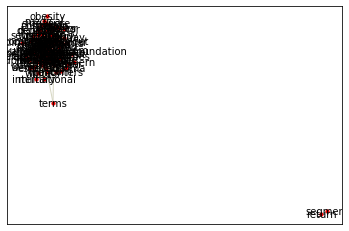

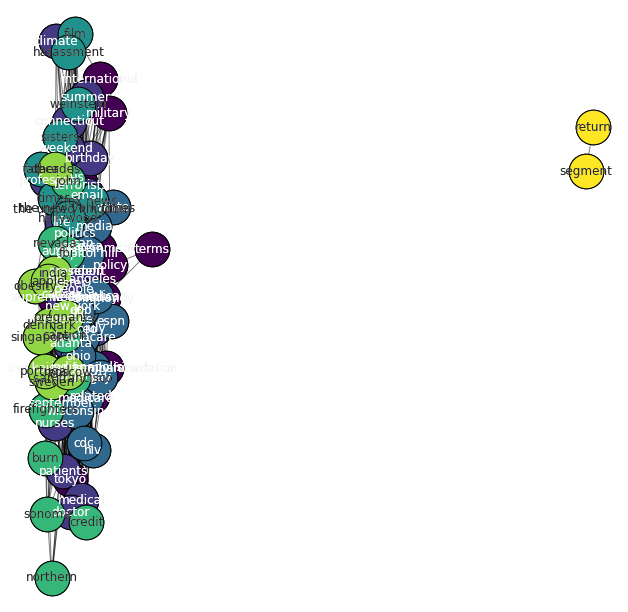

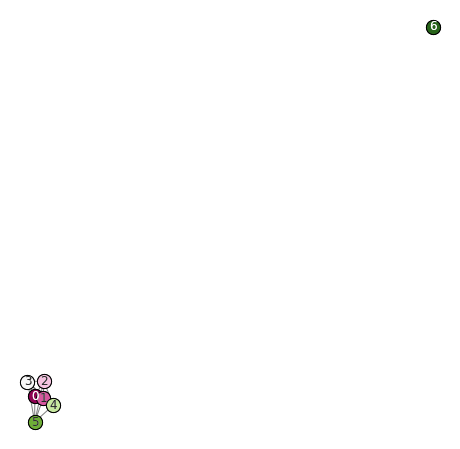

In [ ]:
from communities.algorithms import louvain_method
from communities.visualization import draw_communities
import matplotlib.pyplot as plt 
import random

keyword_nxGraph = keyword_graph.nxGraph
# keyword_nxGraph = keyword_nxGraph_filtered
print(len(keyword_nxGraph))
random_index = [random.randrange(0, len(keyword_nxGraph)) for i in range(100)]

# random_index = [random.randrange(0, 100) for i in range(100)]

selected_nodes = [n[0] for i,n in enumerate(keyword_nxGraph.nodes(data=True)) if i in random_index]  

keyword_nxGraph_subgraph = keyword_nxGraph.subgraph(selected_nodes)

nx.draw_networkx(keyword_nxGraph_subgraph, node_size=10,font_size=10, node_color="#f70000", edge_color="#d6d6c2") 

#plt.show() 
# selected_nodes = [n for i,n,v in enumerate(keyword_nxGraph.nodes(data=True)) if i in random_index]

keyword_communities = algorithms.louvain(keyword_nxGraph_subgraph, weight='weight', resolution=1., randomize=False)
keyword_pos = nx.spring_layout(keyword_nxGraph_subgraph)
viz.plot_network_clusters(keyword_nxGraph_subgraph, keyword_communities, keyword_pos, figsize=(11, 11), node_size=1200, cmap="viridis", plot_labels= True)
viz.plot_community_graph(keyword_nxGraph_subgraph, keyword_communities, cmap="PiYG", plot_labels= True)



In [ ]:
# Preprocessing
# # In case of import errors
# ! pip install nltk
# ! pip install textblob
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import re
# import nltk
# import string
# import re

# from textblob import TextBlob
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# from nltk.stem import LancasterStemmer
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('wordnet')
# # nltk.download()
# # # In case of any corpus are missing 
# # download all-nltk
# # nltk.download()
# stop_words = stopwords.words("english")
# wordnet = WordNetLemmatizer()
# p_stemmer = PorterStemmer()
# def text_preproc(x):
#     x = x.lower() # Lowercase the text
#     # x = ' '.join(wordnet.lemmatize(word, 'v') for word in x.split())
#     # x = ' '.join(p_stemmer.stem(word) for word in x.split())
#     x = ' '.join([word for word in x.split(' ') if word not in stop_words]) #Remove stop words
#     # Remove terms like mentidons, hashtags, links, and more.
#     x = x.encode('ascii', 'ignore').decode() # Remove Unicode characters
#     x = re.sub(r'https*\S+', ' ', x) # Remove URL
#     x = re.sub(r'@\S+', ' ', x) # Remove mentions
#     x = re.sub(r'#\S+', ' ', x) # Remove Hashtags
#     x = re.sub(r'\'\w+', '', x) # Remove ticks and the next character
#     x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x) # Remove punctuations
#     x = re.sub(r'\w*\d+\w*', '', x) # Remove numbers
#     x = re.sub(r'\s{2,}', ' ', x) # Replace the over spaces
#     x = re.sub(r'[.]{2,}', ' ', x)  # multiple dot
#     # x = str(TextBlob(x).correct()) # Spelling correction

#     # x = " ".join(x.split()) #Replacing multiple spaces
#     # x = re.sub("[^a-zA-Z]", " ", x)
#     # x = re.sub(r'\W', ' ', x) #Not a Word Character (Word Character (a-z, A-Z, 0-9, _))
#     # x = re.sub(' +', ' ', x) 
#     # x = re.sub("\n", " ", x)     # #Removing "\n" characters
#     return x
# train_df['text_clean'] = train_df['text'].apply(text_preproc)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=902703f2-430f-48f3-ba3f-6c2fee66cf11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>